# Business Case:By using machine learning models to filter and predict only those movies that a corresponding user is most likely to want to watch. 

# Import Basic libraries

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Load the dataset

In [2]:
dataset = pd.read_csv('Dataset.csv')
movie_title = pd.read_csv('Movie_Id_Titles.csv')

In [3]:
# sample of data
print('dataset :')
print(dataset.head(2))
print('titles :')
print(movie_title.head(2))

dataset :
   user_id  item_id  rating  timestamp
0        0       50       5  881250949
1        0      172       5  881250949
titles :
   item_id             title
0        1  Toy Story (1995)
1        2  GoldenEye (1995)


In [4]:
# combine of data by item id
data = pd.merge(dataset,movie_title , on = 'item_id')

In [5]:
data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [6]:
data.tail()

,user_id,item_id,rating,timestamp,title
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
100002,655,1641,3,887427810,Dadetown (1995)


In [7]:
data.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [8]:
data.shape

(100003, 5)

In [9]:
data.rating.unique()

array([5, 4, 2, 3, 1], dtype=int64)

In [10]:
data.rating.value_counts()

4    34174
3    27145
5    21203
2    11370
1     6111
Name: rating, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100003 entries, 0 to 100002
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    100003 non-null  int64 
 1   item_id    100003 non-null  int64 
 2   rating     100003 non-null  int64 
 3   timestamp  100003 non-null  int64 
 4   title      100003 non-null  object
dtypes: int64(4), object(1)
memory usage: 4.6+ MB


# Data preprocessing

In [21]:
data.isnull().sum()

user_id      0
item_id      0
rating       0
timestamp    0
title        0
dtype: int64

In [22]:
data.duplicated().sum()

0

# EXPLORATORY DATA ANALYSIS

# UNIVARIATE ANALYSIS

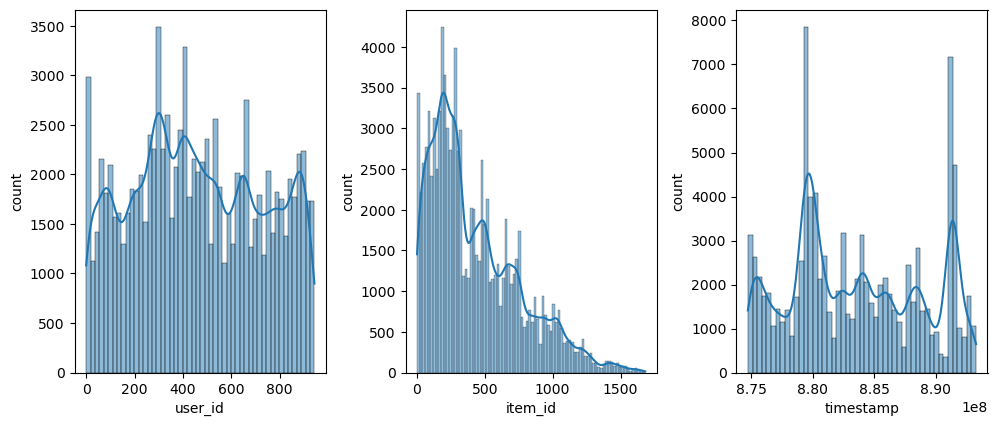

In [25]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in data.drop('rating',axis=True):
    if plotnumber<=3:
        ax=plt.subplot(6,6,plotnumber)
        sns.histplot(x=data[column],kde=True)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('count',fontsize=10)
    plotnumber+=1
plt.tight_layout()

# Bivariate Anslysis

<Axes: xlabel='rating', ylabel='count'>

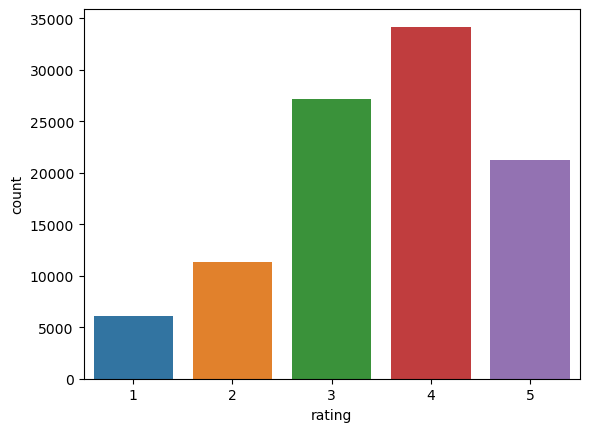

In [26]:
sns.countplot(x=data.rating)

# Multivariate analysis

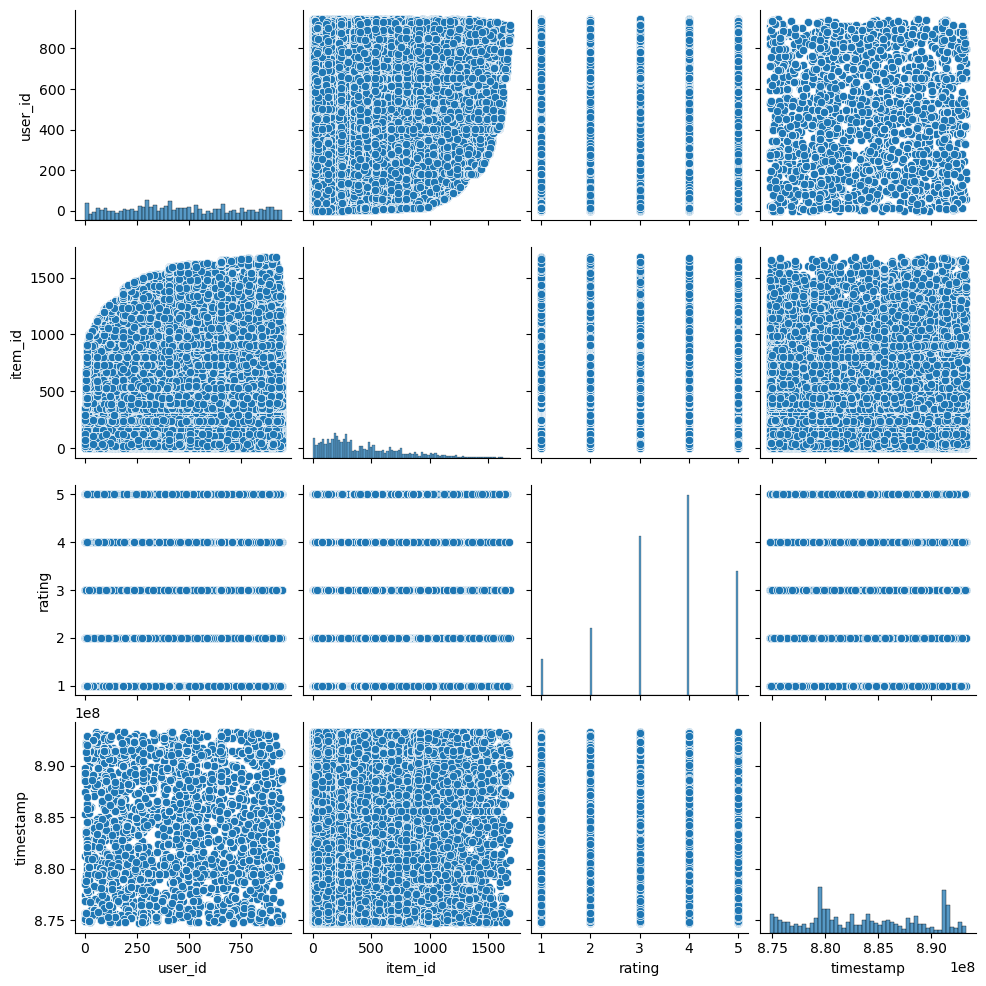

In [28]:
sns.pairplot(data=data)

# Feature Engineering

In [29]:
# Check for multicollinearity
data.corr()

,user_id,item_id,rating,timestamp
user_id,1.000000,0.010425,-0.009377,0.019103
item_id,0.010425,1.000000,-0.189119,0.041878
rating,-0.009377,-0.189119,1.000000,-0.012004
timestamp,0.019103,0.041878,-0.012004,1.000000


<Axes: >

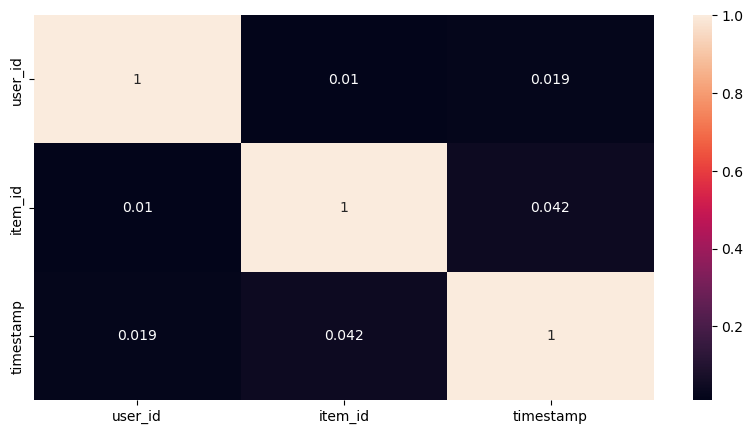

In [32]:
# draw graph
plt.figure(figsize=(10,5))
sns.heatmap(data.drop("rating",axis=1).corr(),annot=True)

# Converting categorical data into numerical data

In [20]:
data.dtypes

user_id       int64
item_id       int64
rating        int64
timestamp     int64
title        object
dtype: object

# Label Encoder

In [21]:
df=data.copy()

In [52]:
## Using label encoder to convert the categorical data to numerical data
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
df.title=lc.fit_transform(df.title)

In [53]:
df.head(3)

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,1398
1,290,50,5,880473582,1398
2,79,50,4,891271545,1398


# Model Building

# Split the data into train and test

In [54]:
# Split data into x & y 
x=df.drop('rating',axis=1)
y=df[["rating"]]

In [55]:
# split data for training & testing 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=2)

In [56]:
print(x_train.shape)
print(x_test.shape)

(70002, 4)
(30001, 4)


# Logistic regression

In [28]:
# import the Logistic regression model 
from sklearn.linear_model import LogisticRegression 
## initiallisation of the model
model=LogisticRegression()

model.fit(x_train,y_train)

LogisticRegression()

In [29]:
##make predictions by testing data 
# evaluate by using the x_test 
y_pred=model.predict(x_test)
y_pred

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

# Evaluate the model

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

In [32]:
accuracy_score(y_test,y_pred)

0.33888870370987634

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1840
           2       0.00      0.00      0.00      3419
           3       0.00      0.00      0.00      8187
           4       0.34      1.00      0.51     10167
           5       0.00      0.00      0.00      6388

    accuracy                           0.34     30001
   macro avg       0.07      0.20      0.10     30001
weighted avg       0.11      0.34      0.17     30001



# Support Vector Classifier

In [35]:
# Support Vector Classifier Model
from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(x_train, y_train)

SVC()

In [36]:
# Predict output for x_test
y_pred=svclassifier.predict(x_test)

# Model evaluation

In [37]:
## evaluating the model created
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc=accuracy_score(y_test,y_pred)
acc

0.33888870370987634

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1840
           2       0.00      0.00      0.00      3419
           3       0.00      0.00      0.00      8187
           4       0.34      1.00      0.51     10167
           5       0.00      0.00      0.00      6388

    accuracy                           0.34     30001
   macro avg       0.07      0.20      0.10     30001
weighted avg       0.11      0.34      0.17     30001



# Decision tree classifier

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.25,random_state=3)

In [42]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier() 
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [43]:
y_train_predict=model.predict(x_train)#predicting training data to check training performance 
y_train_predict

array([5, 4, 3, ..., 3, 3, 5], dtype=int64)

# Model evaluation

In [44]:
# training accuracy
from sklearn.metrics import accuracy_score,classification_report,f1_score
accuracy_score(y_train,y_train_predict)

1.0

In [45]:
# testing accuracy
accuracy_score(y_test,y_pred)

0.311947522099116

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.23      0.23      0.23      1502
           2       0.16      0.17      0.17      2794
           3       0.31      0.32      0.31      6748
           4       0.38      0.36      0.37      8671
           5       0.32      0.32      0.32      5286

    accuracy                           0.31     25001
   macro avg       0.28      0.28      0.28     25001
weighted avg       0.31      0.31      0.31     25001



# Gradient Boosting

In [47]:
# Model building
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier(n_estimators=120)
GB.fit(x_train,y_train)
y_pred=GB.predict(x_test)

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.69      0.14      0.24      1502
           2       0.28      0.00      0.01      2794
           3       0.36      0.27      0.31      6748
           4       0.38      0.78      0.51      8671
           5       0.50      0.17      0.25      5286

    accuracy                           0.39     25001
   macro avg       0.44      0.27      0.26     25001
weighted avg       0.41      0.39      0.33     25001



# Techniques Used

### Model Selection:

Choosing the right machine learning algorithm or combination of algorithms can be a significant challenge. In the 
context of classification tasks, such as predicting whether a client will subscribe to a term deposit or not, commonly 
explored options include XGBoost, Random Forest, and Linear Regression models.

### Smote:

SMOTE helps in improving the performance of machine learning models when trained on imbalanced datasets because it increases the representation of the minority class. This can lead to better model generalization and predictive accuracy for the minority class.

### Ensemble Techniques:

Leveraging ensemble methods, such as stacking or blending multiple models like XGBoost, Random Forest, and Gradient Boosting, can significantly enhance predictive accuracy.

### Feature Engineering for Categorical Data:

Label encoding and target encoding methods are utilized to convert categorical variables into an appropriate format for modeling purposes.  